Importing Important Lib

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error, r2_score

In [2]:
#Loading Dataset
train = pd.read_csv('Restaurant_Food_Cost-Train.csv')
test = pd.read_csv('Restaurant_Food_Cost-Test.csv')

In [3]:
train.head(5)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
test.head(5)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [5]:
#shape of train dataset
train.shape

(12690, 9)

In [6]:
#shape of test dataset
test.shape

(4231, 8)

In [7]:
train["source"] = "train"
test["source"] = "test"

In [8]:
df = pd.concat([train,test])

In [9]:
df.shape

(16921, 10)

In [10]:
#info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16774 non-null  object 
 5   LOCALITY       16793 non-null  object 
 6   RATING         16917 non-null  object 
 7   VOTES          15315 non-null  object 
 8   COST           12690 non-null  float64
 9   source         16921 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [11]:
df.duplicated().sum()

26

In [12]:
droping column which is not required  
df= df.drop_duplicates()

In [13]:
df.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1602
COST             4230
source              0
dtype: int64

In [14]:
#combining City and locality
df['Location']=df['CITY']+' '+df['LOCALITY']
df.drop(columns=['CITY','LOCALITY'])

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,source,Location
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49 votes,1200.0,train,Thane Dombivali East
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),4.2,30 votes,1500.0,train,Chennai Ramapuram
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221 votes,800.0,train,Chennai Saligramam
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),4.1,24 votes,800.0,train,Mumbai Bandra West
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),3.8,165 votes,300.0,train,Mumbai Lower Parel
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),3.9,287 votes,NaN,test,New Delhi Punjabi Bagh
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),4.3,469 votes,NaN,test,Bangalore HSR Layout
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),3.7,53 votes,NaN,test,Faridabad Sector 86
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",-,NaN,NaN,test,Kochi Kochi


In [15]:
df.dropna(subset=['Location'],inplace=True)

In [16]:
cuisines_list=[]
for row in df['CUISINES']:
    cuisines_list.append(list(row.split(',')))

df['CUISINES']=cuisines_list

In [17]:
df['CUISINES'].isna().sum()

0

In [18]:
df_cuisines=df['CUISINES'].apply(lambda x: pd.Series(1, x))

In [19]:
title_list=[]
for row in df['TITLE']:
    title_list.append(list(row.split(',')))
df['TITLE']=title_list

In [20]:
df_title=df['TITLE'].apply(lambda x: pd.Series(1, x))
df_title.head()

,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,CAFÉ,MICROBREWERY,BEVERAGE SHOP,IRANI CAFE,BAKERY,None,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df[df['RATING'].isna()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source,Location
204,[BAKERY],15062,[Bakery],Not Available,Kochi,Marine Drive,NaN,NaN,200.0,train,Kochi Marine Drive
421,[CAFÉ],14127,"[Cafe, Fast Food]",Not Available,Hyderabad,Banjara Hills,NaN,NaN,350.0,train,Hyderabad Banjara Hills
2035,[QUICK BITES],2776,"[Kerala, Arabian]",Not Available,Kochi,Kakkanad,NaN,NaN,NaN,test,Kochi Kakkanad
2758,[None],11301,"[Chinese, North Indian, South Indian]",Not Available,Kochi,Tripunithura,NaN,NaN,NaN,test,Kochi Tripunithura


In [22]:
df["RATING"] = df.groupby("CITY").RATING.transform(lambda x : x.fillna(x.mode()[0]))
df['RATING']=df['RATING'].str.extract('(\d+)').astype(float)

In [23]:
df['VOTES'].isna().sum()

1579

In [24]:
df.VOTES.fillna('0',inplace=True)
df['VOTES']=df['VOTES'].str.extract('(\d+)').astype(float)

In [25]:
df.drop(columns='CITY',inplace=True)
df.drop(columns='LOCALITY',inplace=True)
df.drop(columns='CUISINES',inplace=True)

In [26]:
df_City=pd.get_dummies(df['Location'])
df.drop(columns='Location',inplace=True)
df_City.head()

,10th avenue Saane Apartment,1st Stage Maruthi Nagar Main Road,1st Tavarekere 3rd Cross Cashire Layout,3rd Street Old Door AA24 AA Block,5th Main Teachers Colony Koramangala Block 1 Bangalore 560034 The Mylapore Cafe 29,6 & 7 - 4/64 Subhash Nagar 5,682024 Kochi,682035. Kerala,682036 Kerala,APR Chambers House 3-5-909/B/1,...,kochi Kacheripady,kochi Kathrikadavu,kochi Thaikkavu Aluva 6,kochi kakkanad,navi mumbai seawoods grand central mall,opp gurudwara Shakurpur Near Jeevan Jyoti Apartment,opp mukteshwar ashram powai Shop no 3,opposite to western side of ITPL Service gate Whitefield,p.o Kochi Edappally,ward X11 MPL 6303
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df = pd.concat([df,df_City,df_cuisines,df_title], axis=1)

In [28]:
df.drop(columns='TITLE',inplace=True)

In [29]:
df_column_category = df.select_dtypes(exclude=np.number).columns
df_column_category

Index(['TIME', 'source'], dtype='object')

In [30]:
df.drop(columns='TIME',inplace=True)
df.fillna(0,inplace=True)

# EDA

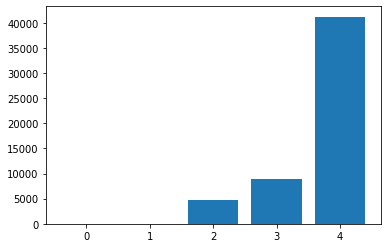

In [32]:
plt.bar(x=df['RATING'],height=df['VOTES'])
plt.show()

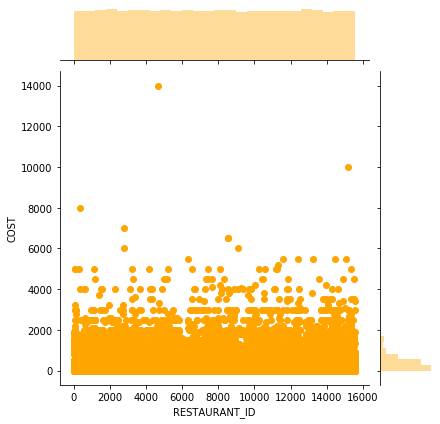

In [33]:
sns.jointplot(x='RESTAURANT_ID',y='COST',data=df, color='orange')

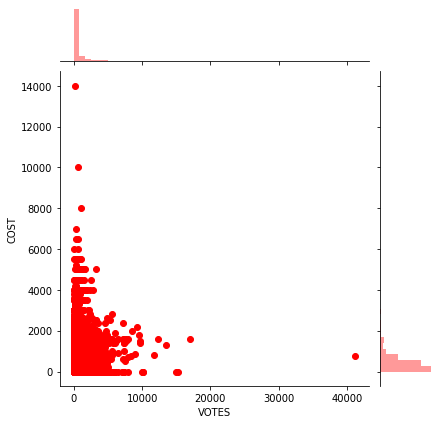

In [34]:
sns.jointplot(x='VOTES',y='COST',data=df, color='red')

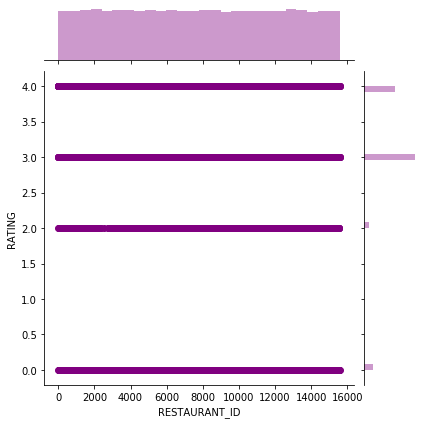

In [35]:
sns.jointplot(x='RESTAURANT_ID',y='RATING',data=df, color='purple')

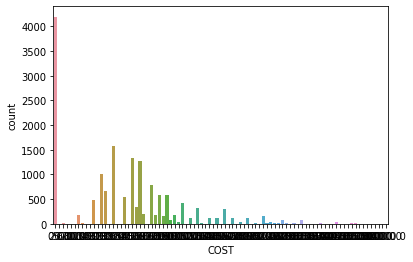

In [36]:
sns.countplot(x='COST',data=df)

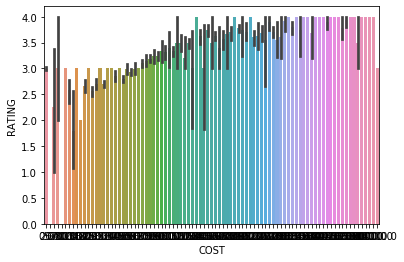

In [37]:
sns.barplot(df["COST"],df['RATING'])

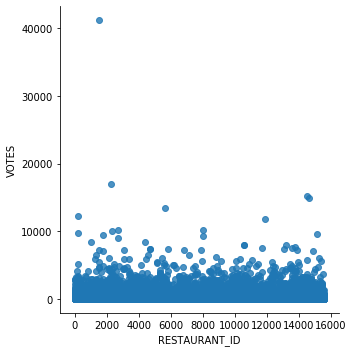

In [38]:
sns.lmplot('RESTAURANT_ID', 'VOTES', data = df)

In [39]:
train_final = df[df.source=="train"]
test_final = df[df.source=="test"]


In [40]:
train_final.shape

(12552, 2209)

In [41]:
train_final.drop(columns=["source"],inplace=True)

In [42]:
test_final.drop(columns=["source",'COST'],inplace=True)

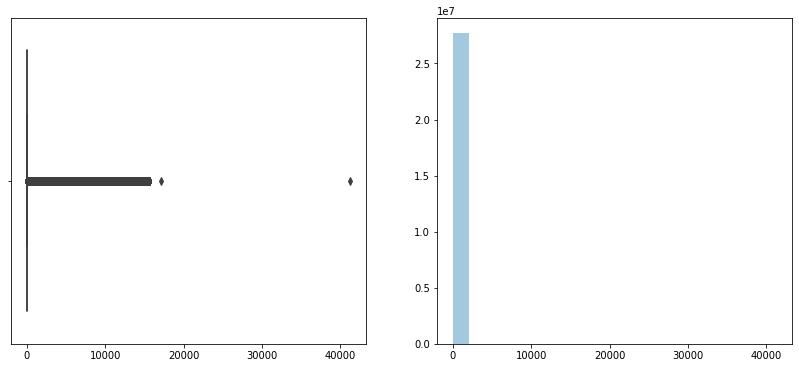

In [43]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(train_final)
plt.subplot(1,2,2)
sns.distplot(train_final, bins=20, kde=False)
plt.show()


Data Preprocessing

In [44]:
train_x = train_final.drop(columns=["COST",'RESTAURANT_ID'])

In [45]:
train_y = train_final["COST"]

In [46]:
test_x = test_final.drop(columns=["RESTAURANT_ID"])

In [47]:
train_x.fillna(0,inplace=True)
train_x.isna().sum()

RATING                                     0
VOTES                                      0
10th avenue Saane Apartment                0
1st Stage Maruthi Nagar Main Road          0
1st Tavarekere 3rd Cross Cashire Layout    0
                                          ..
DHABA                                      0
MEAT SHOP                                  0
COCKTAIL BAR                               0
PAAN SHOP                                  0
BHOJANALYA                                 0
Length: 2206, dtype: int64

Linear Regression

In [48]:
model = LinearRegression()
model.fit(train_x, train_y)
dtrain_predictions = model.predict(train_x)

In [49]:
a = cross_val_score(model, train_x, train_y, cv=5, scoring='neg_mean_squared_error')

In [50]:
print("\nModel Report")
print("RMSE : %.4g" % np.sqrt(mean_squared_error(train_y.values, dtrain_predictions)))
    
test_x.fillna(0,inplace=True)
test_final["res_linear"] =  model.predict(test_x)


Model Report
RMSE : 296.9


In [52]:
print('r2 train',r2_score(train_y,dtrain_predictions))

r2 train 0.7771663607832928


In [53]:
Linear_submission = test_final[["RESTAURANT_ID","res_linear"]]

In [54]:
Linear_submission.head(20)

,RESTAURANT_ID,res_linear
0,4085,1033.412544
1,12680,343.699592
2,1411,600.852341
3,204,267.353579
4,13453,225.075083
5,4518,160.219656
6,1643,407.514523
7,5109,988.517067
8,5606,323.034546
9,14319,681.902795


Decision Tree Regressor

In [55]:
tree = DecisionTreeRegressor(max_depth = 15, min_samples_leaf = 100)
tree.fit(train_x, train_y) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [56]:
tree_accuracy=round(tree.score(train_x,train_y)*100)
tree_accuracy

67.0

RandomForest Regressor

In [57]:
forest = RandomForestRegressor(n_estimators=400, max_depth=10, min_samples_leaf = 100,n_jobs=4)
forest.fit(train_x, train_y)

forest_pred=forest.predict(test_x)

forest_accuracy=round(forest.score(train_x,train_y)*100)
forest_accuracy

65.0

KNeighbors Regressor

In [58]:
knn = KNeighborsRegressor(n_neighbors = 5, metric= 'minkowski', p=2)
knn.fit(train_x, train_y)

knn_accuracy=knn.predict(test_x)

knn_accuracy=round(knn.score(train_x,train_y)*100)
knn_accuracy

47.0

In [59]:
y_pred = model.predict(test_x)
y_pred

array([1033.4125436 ,  343.69959179,  600.85234144, ...,  665.40081899,
        141.2417347 ,  464.42232415])

In [60]:
from sklearn.externals import joblib
joblib.dump(model,'Restaurant_Food_Cost-Train.obj')

['Restaurant_Food_Cost-Train.obj']